# Nonparametric survival analyses

    Dinh-Phong NGUYEN
    http://deepphong.netlify.com/

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

from lifelines.datasets import load_leukemia
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines.plotting import add_at_risk_counts

In [3]:
data = load_leukemia()

In [4]:
data.sample(6)

,t,status,sex,logWBC,Rx
1,34,0,1,1.47,0
12,11,0,0,2.60,0
15,9,0,0,2.80,0
2,32,0,1,2.20,0
29,8,1,0,3.52,1
4,25,0,1,1.78,0


## Kaplan-Meier estimates and log-rank test

In [5]:
kmf = KaplanMeierFitter()

In [6]:
T = data["t"]
E = data["status"]
t = np.linspace(0, 50, 51)

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 42 observations, 12 censored>

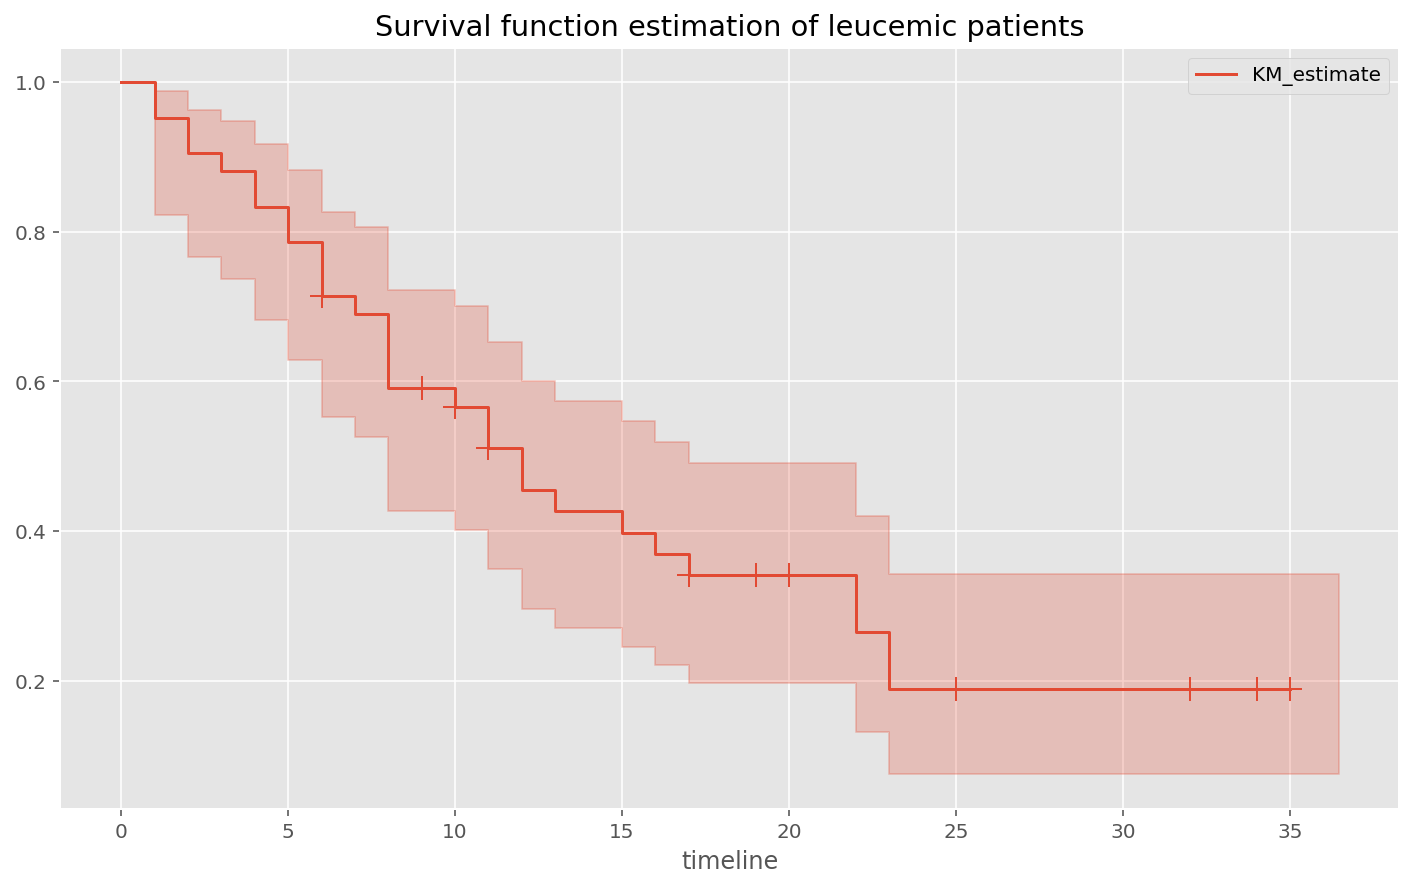

In [7]:
kmf.plot(figsize=(12,7), show_censors=True)
plt.title('Survival function estimation of leucemic patients');

In [8]:
kmf.median_

12.0

Median survival time of males: 16.0
Median survival time of females: 12.0

t_0=-1, alpha=0.95, null_distribution=chi squared, df=1

test_statistic      p   
        0.5569 0.4555
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


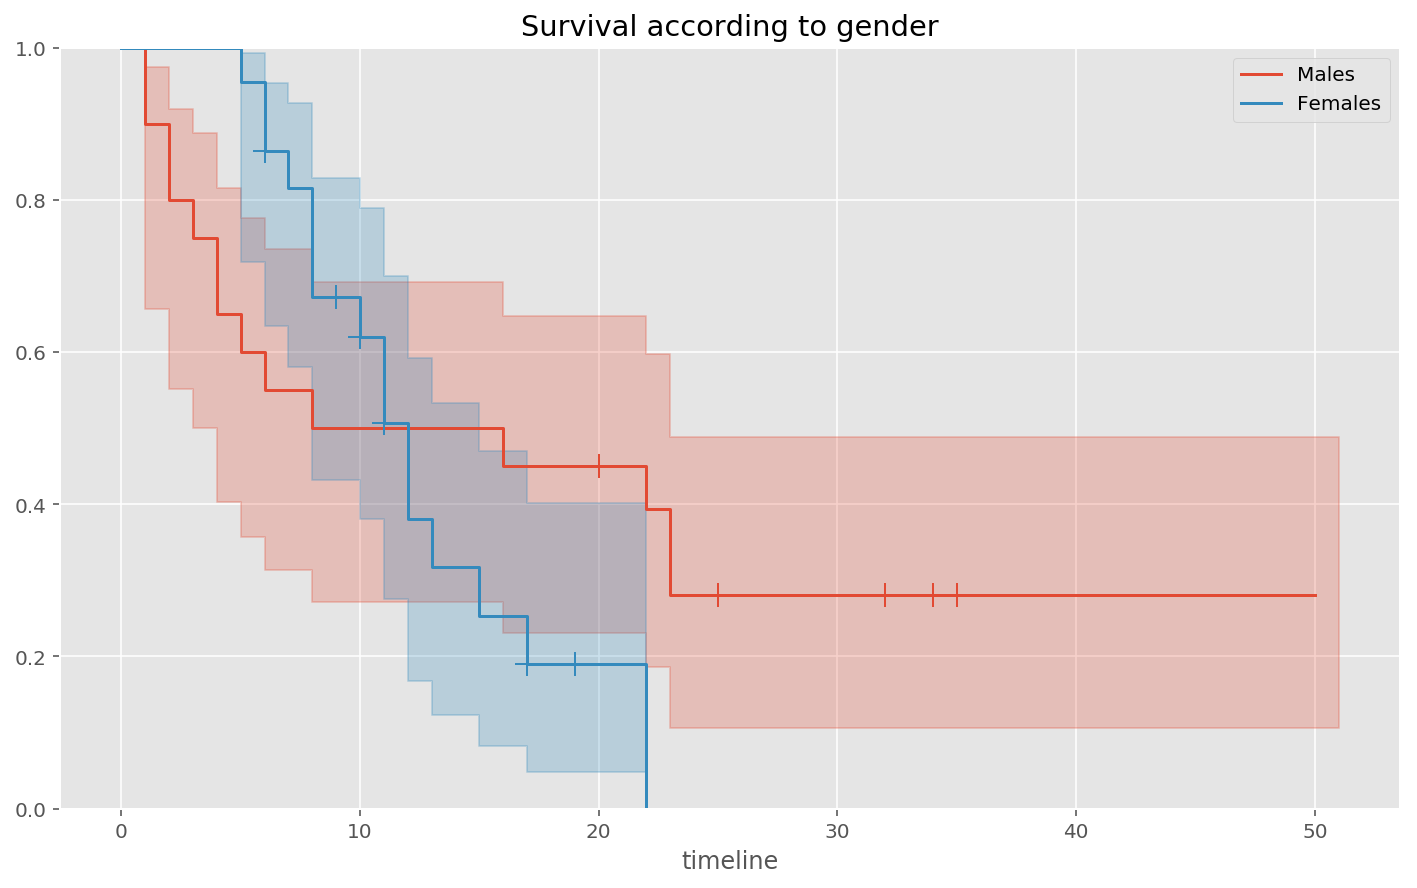

In [9]:
ax = plt.subplot(111)

sex = (data["sex"] == 1)
kmf.fit(T[sex], event_observed=E[sex], timeline=t, label="Males")
ax = kmf.plot(ax=ax,figsize=(12,7), show_censors=True)
print("Median survival time of males:", kmf.median_)

kmf.fit(T[~sex], event_observed=E[~sex], timeline=t, label="Females")
ax = kmf.plot(ax=ax, show_censors=True)
print("Median survival time of females:", kmf.median_)

plt.ylim(0,1)
plt.title("Survival according to gender");

results = logrank_test(T[sex], T[~sex], event_observed_A=E[sex], event_observed_B=E[~sex])
results.print_summary()

Median survival time of patients with placebo: 8.0
Median survival time of treated patients: 23.0

t_0=-1, alpha=0.95, null_distribution=chi squared, df=1

test_statistic      p     
       16.7929 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


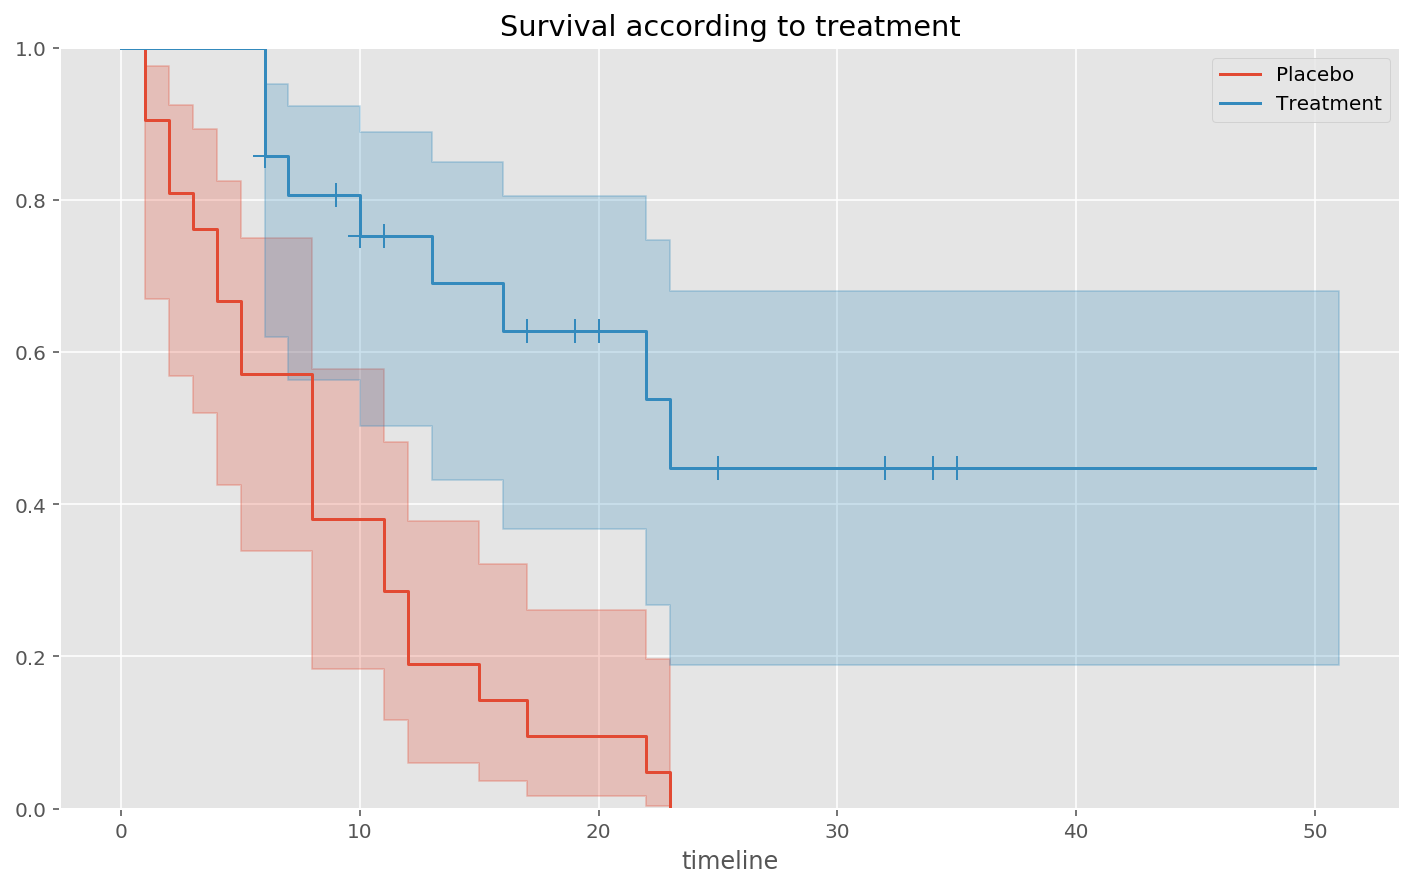

In [10]:
ax = plt.subplot(111)

ttt = (data["Rx"] == 1)
kmf.fit(T[ttt], event_observed=E[ttt], timeline=t, label="Placebo")
ax = kmf.plot(ax=ax,figsize=(12,7), show_censors=True)
print("Median survival time of patients with placebo:", kmf.median_)

kmf.fit(T[~ttt], event_observed=E[~ttt], timeline=t, label="Treatment")
ax = kmf.plot(ax=ax, show_censors=True)
print("Median survival time of treated patients:", kmf.median_)

plt.ylim(0,1)
plt.title("Survival according to treatment");

results = logrank_test(T[ttt], T[~ttt], event_observed_A=E[ttt], event_observed_B=E[~ttt])
results.print_summary()

## Cox proportional hazards

In [12]:
cph = CoxPHFitter()
cph.fit(data, duration_col='t', event_col='status')

print("Cox-PH model summary: ")
cph.print_summary()

Cox-PH model summary: 
n=42, number of events=30

         coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95     
sex    0.3147     1.3698    0.4545 0.6923 0.4887     -0.5761      1.2055     
logWBC 1.6819     5.3760    0.3366 4.9971 0.0000      1.0223      2.3416  ***
Rx     1.5036     4.4978    0.4615 3.2580 0.0011      0.5990      2.4081   **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.851


In [24]:
def plot_loglogs(df, features, rows, columns, title):
    fig, axes = plt.subplots(rows, columns, figsize=(7*columns,5*rows))
    for i,f in enumerate(features):
        categories = np.unique(df[f])
        for j in categories:
            df_0 = df.loc[df[f] == j]
            kmf0 = KaplanMeierFitter()
            kmf0.fit(df_0['t'], event_observed=df_0['status'])
            kmf0.plot_loglogs(ax=axes[i])

        axes[i].legend([0,1])
        axes[i].set_title(title[i])

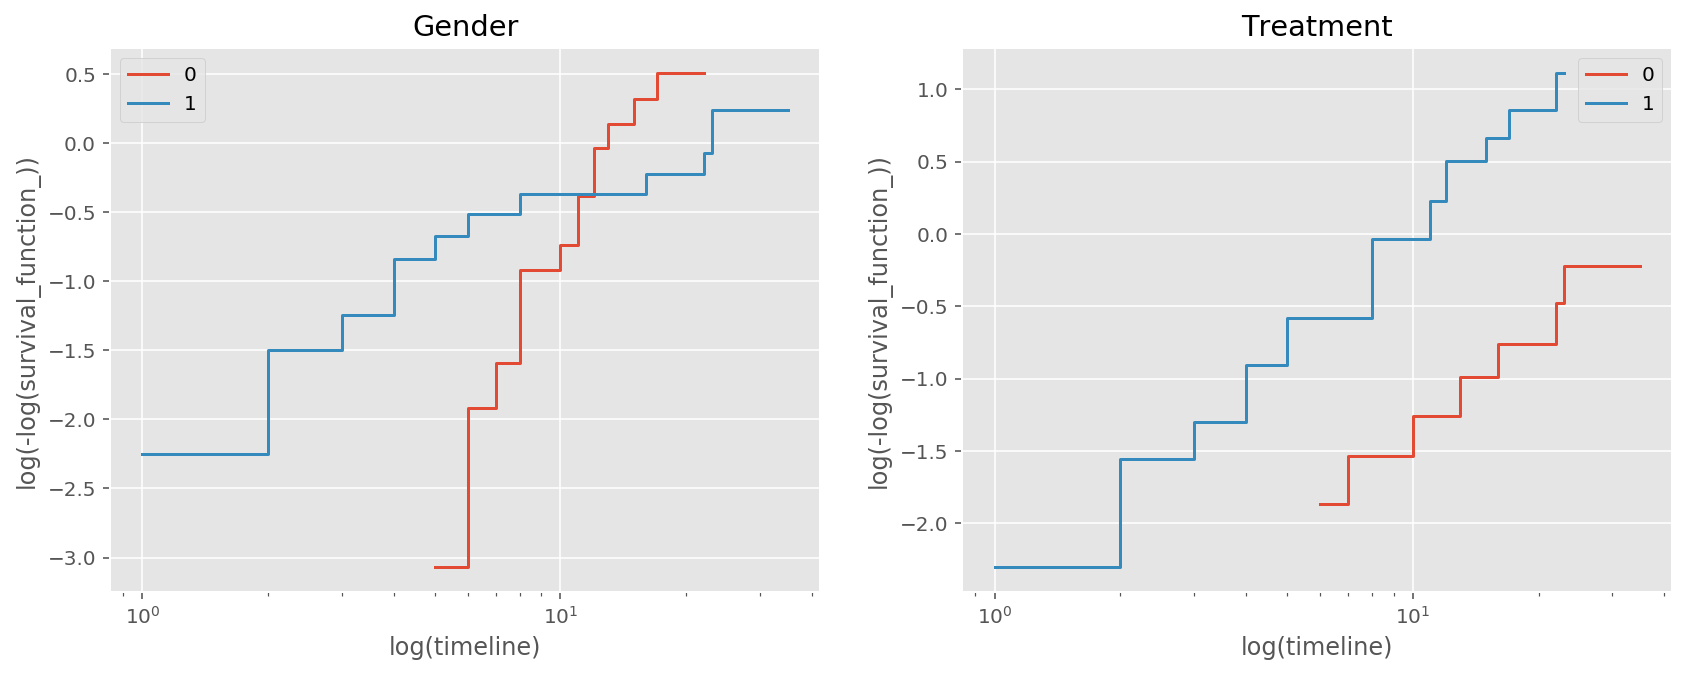

In [25]:
check_features = ["sex", "Rx"]
title = ["Gender", "Treatment"]
plot_loglogs(data, check_features, 1, 2, title)